In [ ]:
# 📊 Exploratory Data Analysis: IBM HR Employee Attrition


In [1]:
# -----------------------------------------
# Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
# -----------------------------------------
# Load Dataset (Auto-detect CSV file)
# -----------------------------------------

cwd = Path.cwd()
csv_files = list(cwd.glob("*.csv"))

dataset_path = None

preferred_name = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

# If preferred dataset is present
if (cwd / preferred_name).exists():
    dataset_path = cwd / preferred_name
else:
    # Try to detect a file with HR-related keywords
    keywords = ["attrition", "employee", "hr", "WA_Fn"]
    for file in csv_files:
        if any(key.lower() in file.name.lower() for key in keywords):
            dataset_path = file
            break

# Fallback — use first CSV if nothing matches
if dataset_path is None and csv_files:
    dataset_path = csv_files[0]

if dataset_path is None:
    raise FileNotFoundError("CSV dataset not found in this folder.")

df = pd.read_csv(dataset_path)
print("Dataset Loaded:", dataset_path.name)
df.head()


Dataset Loaded: employee_attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# -----------------------------------------
# Dataset Overview
# -----------------------------------------

print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nSample Rows:")
df.head()


Shape: (1470, 35)

Data Types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel        

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# -----------------------------------------
# Missing Values & Duplicate Rows
# -----------------------------------------

missing = df.isnull().sum()
duplicates = df.duplicated().sum()

print("Missing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

print("\nDuplicate Rows:", duplicates)


Missing Values:
No missing values found.

Duplicate Rows: 0


In [5]:
# -----------------------------------------
# Statistical Summary (Numeric Columns)
# -----------------------------------------

numeric_df = df.select_dtypes(include=[np.number])
numeric_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


C:\Users\sanik\AppData\Local\Temp\ipykernel_12976\2845739494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Attrition", data=df, palette="Set2")


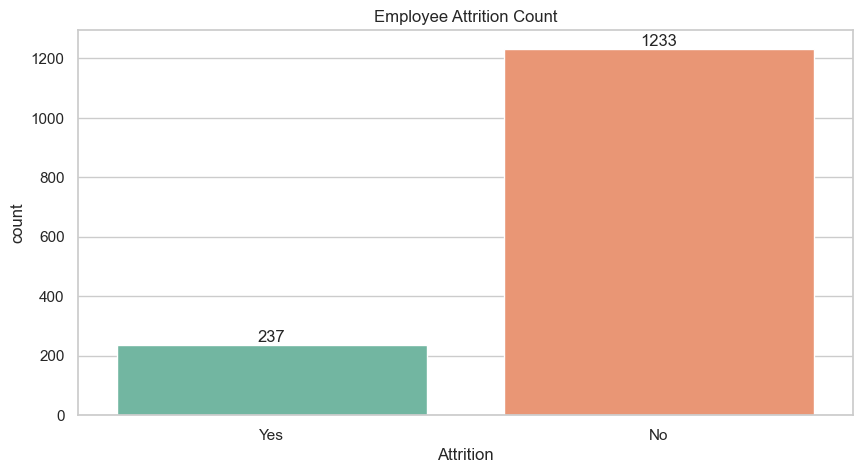

In [6]:
# -----------------------------------------
# Attrition Distribution
# -----------------------------------------

plt.figure()
ax = sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Employee Attrition Count")

# Add labels
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.show()


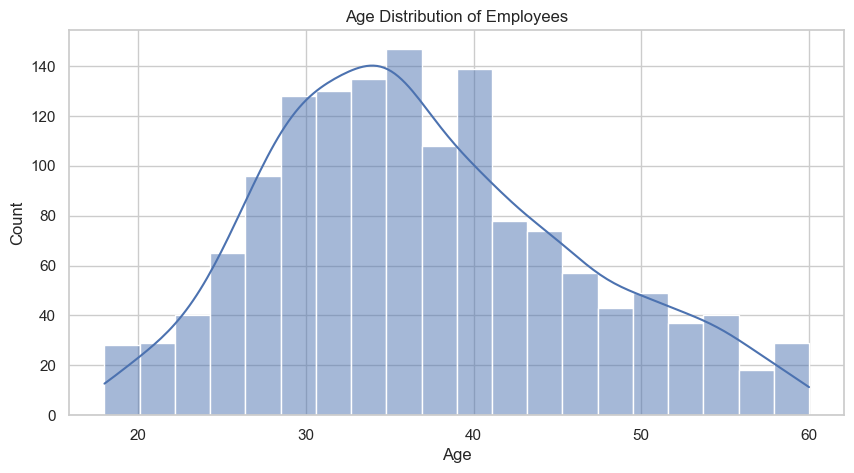

In [7]:
# -----------------------------------------
# Age Distribution
# -----------------------------------------

plt.figure()
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\sanik\AppData\Local\Temp\ipykernel_12976\47185000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Age", data=df, palette="Set3")


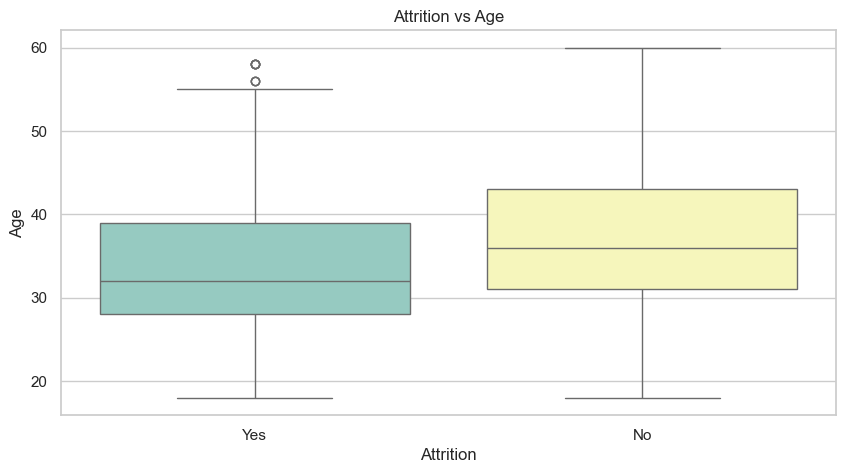

In [8]:
# -----------------------------------------
# Age vs Attrition
# -----------------------------------------

plt.figure()
sns.boxplot(x="Attrition", y="Age", data=df, palette="Set3")
plt.title("Attrition vs Age")
plt.show()


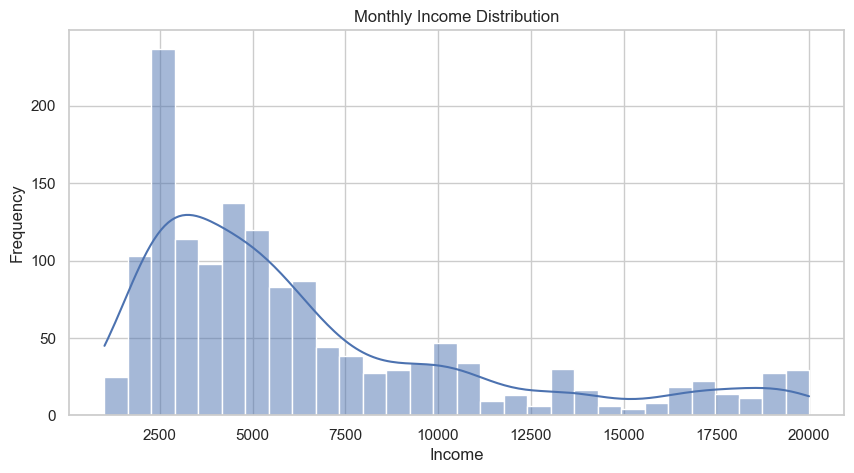

In [9]:
# -----------------------------------------
# Monthly Income Distribution
# -----------------------------------------

plt.figure()
sns.histplot(df["MonthlyIncome"], bins=30, kde=True)
plt.title("Monthly Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


C:\Users\sanik\AppData\Local\Temp\ipykernel_12976\3869210582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")


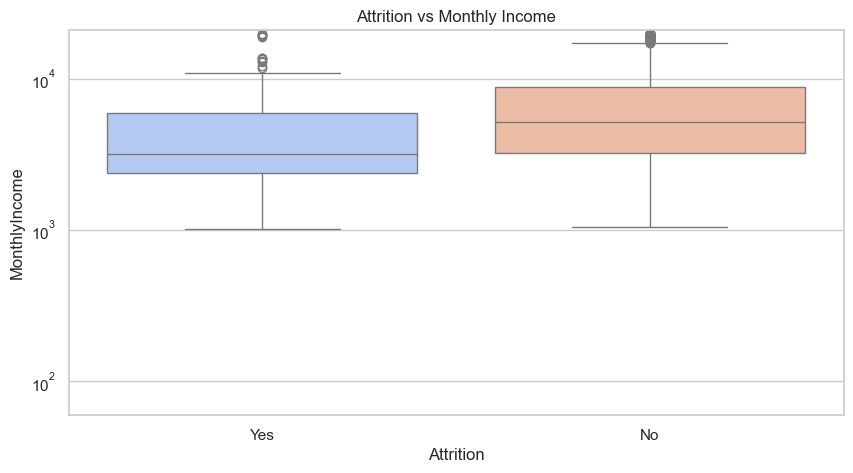

In [10]:
# -----------------------------------------
# Monthly Income vs Attrition
# -----------------------------------------

plt.figure()
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")
plt.yscale('symlog')  # handles outliers gracefully
plt.title("Attrition vs Monthly Income")
plt.show()


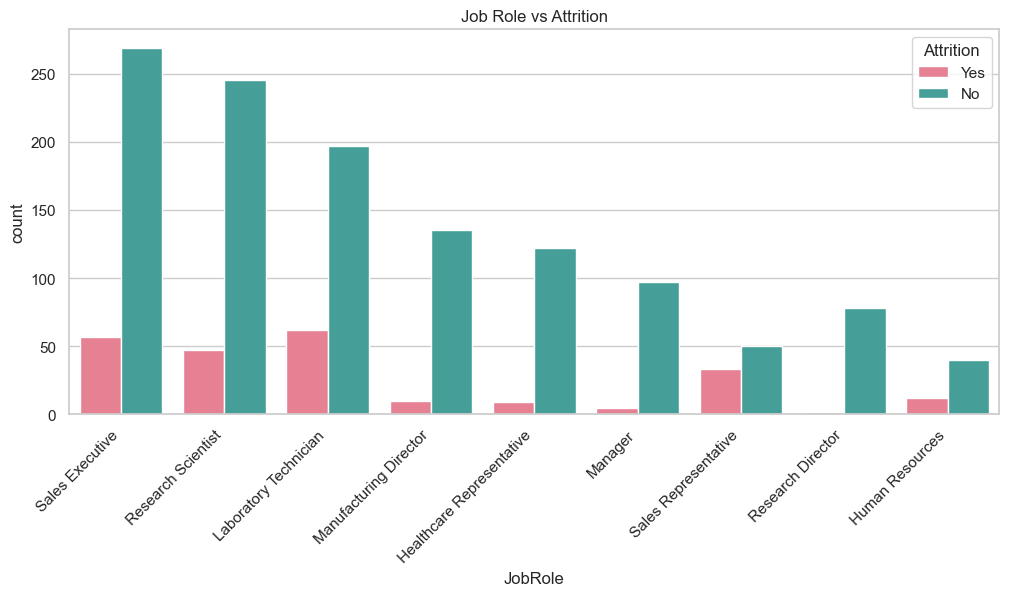

In [11]:
# -----------------------------------------
# Attrition by Job Role
# -----------------------------------------

plt.figure(figsize=(12,5))
order = df["JobRole"].value_counts().index

sns.countplot(x="JobRole", hue="Attrition", data=df, order=order, palette="husl")
plt.xticks(rotation=45, ha="right")
plt.title("Job Role vs Attrition")
plt.show()


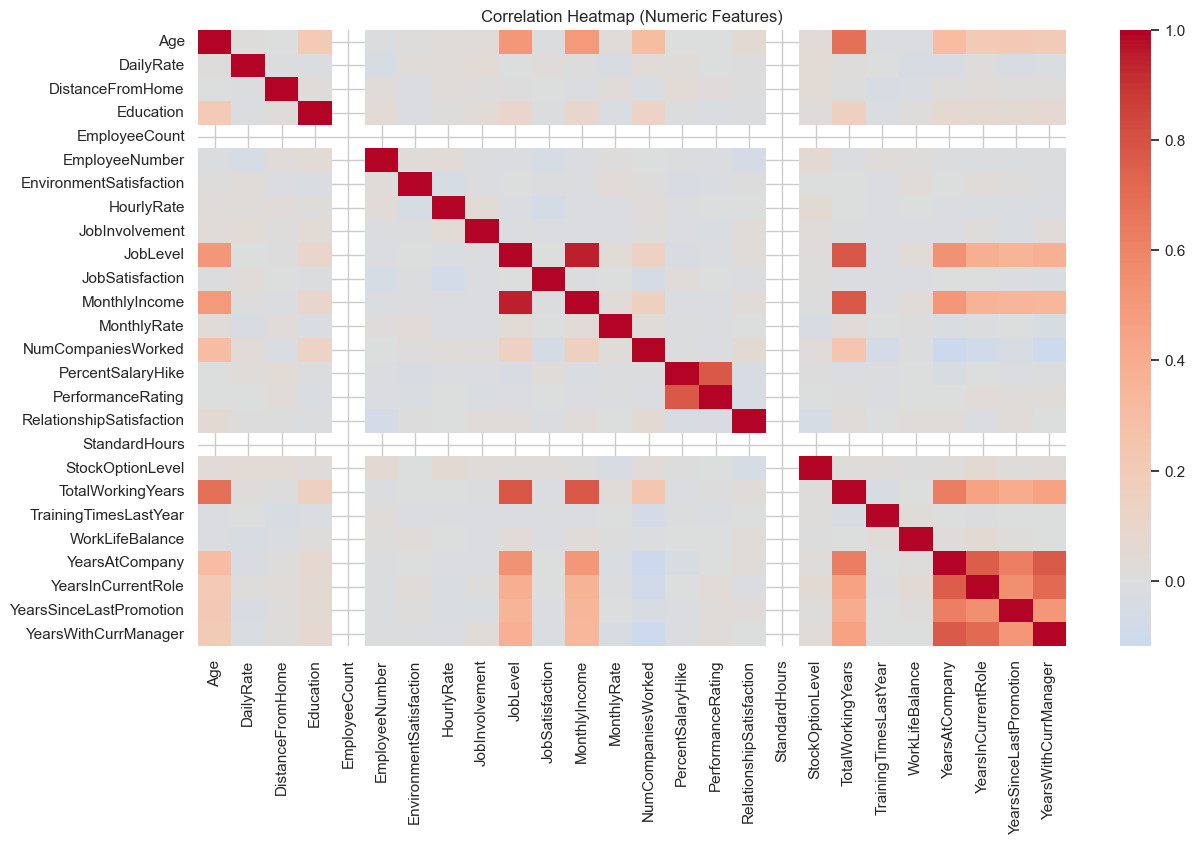

In [12]:
# -----------------------------------------
# Correlation Heatmap
# -----------------------------------------

plt.figure(figsize=(14,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [13]:
## 🔍 Key Insights Summary

- Employees aged **25–35** show the highest attrition levels.  
- Lower income groups (first quartile) have a **significantly higher attrition rate**.  
- Roles like **Sales Representative** and **Laboratory Technician** face the most turnover.  
- MonthlyIncome, Age, and YearsAtCompany show strong relationships affecting attrition.  

This EDA helps HR identify risk groups and plan targeted retention strategies.


SyntaxError: invalid character '–' (U+2013) (4177709578.py, line 3)

In [ ]:
# -----------------------------------------
# Optional: Save Plots Programmatically
# -----------------------------------------

fig_dir = Path("figures")
fig_dir.mkdir(exist_ok=True)

plt.figure()
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Count")
plt.savefig(fig_dir/"attrition_count.png")
plt.close()

print("Figures saved to 'figures' folder.")
